# 1. Data Preprocessing

# (1) Reading the Training, the Development and the Testing Datasets 

In [1]:
import pandas as pd
from os import listdir

import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory1 = 'data/train'
paths1 = listdir(directory1)
paths1.sort()
paths1

['anger-ratings-0to1.train.txt',
 'fear-ratings-0to1.train.txt',
 'joy-ratings-0to1.train.txt',
 'sadness-ratings-0to1.train.txt']

In [3]:
emotion = 'whole'

In [4]:
train_anger = pd.read_csv('%s/%s' %(directory1,paths1[0]), delimiter='\t',header=None)
train_anger.head()

,0,1,2,3
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
train_anger.columns = ['SentID', 'Tweet', 'Emotion', 'Rating']
train_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
5,10005,My blood is boiling,anger,0.875
6,10006,When you've still got a whole season of Wentwo...,anger,0.875
7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875
8,10008,@TeamShanny legit why i am so furious with him...,anger,0.875
9,10009,How is it suppose to work if you do that? Wtf ...,anger,0.875


In [6]:
train_fear = pd.read_csv('%s/%s' %(directory1,paths1[1]), delimiter='\t',header=None)
train_fear.columns = train_anger.columns

train_joy = pd.read_csv('%s/%s' %(directory1,paths1[2]), delimiter='\t',header=None) 
train_joy.columns = train_anger.columns

train_sadness = pd.read_csv('%s/%s' %(directory1,paths1[3]), delimiter='\t',header=None) 
train_sadness.columns = train_anger.columns

In [7]:
# check if there are any duplicates(subset = all of the columns)

assert train_fear.duplicated().sum() == 0
assert train_anger.duplicated().sum() == 0
assert train_joy.duplicated().sum() == 0
assert train_sadness.duplicated().sum() == 0

In [8]:
# checking missing data & len(train),len(test)
print(train_anger.info(), train_fear.info(), train_joy.info(), train_sadness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   857 non-null    int64  
 1   Tweet    857 non-null    object 
 2   Emotion  857 non-null    object 
 3   Rating   857 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   1147 non-null   int64  
 1   Tweet    1147 non-null   object 
 2   Emotion  1147 non-null   object 
 3   Rating   1147 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   823 non-null  

In [9]:
print(train_anger.describe(), "\n", train_fear.describe(), "\n", train_joy.describe(), "\n", train_sadness.describe() )

             SentID      Rating
count    857.000000  857.000000
mean   10428.000000    0.496475
std      247.538886    0.169169
min    10000.000000    0.067000
25%    10214.000000    0.375000
50%    10428.000000    0.479000
75%    10642.000000    0.604000
max    10856.000000    0.938000 
              SentID       Rating
count   1147.000000  1147.000000
mean   20573.000000     0.495579
std      331.254686     0.194792
min    20000.000000     0.062000
25%    20286.500000     0.354000
50%    20573.000000     0.479000
75%    20859.500000     0.625000
max    21146.000000     0.979000 
             SentID      Rating
count    823.00000  823.000000
mean   30411.00000    0.492618
std      237.72393    0.204334
min    30000.00000    0.019000
25%    30205.50000    0.340000
50%    30411.00000    0.480000
75%    30616.50000    0.646000
max    30822.00000    0.980000 
              SentID      Rating
count    786.000000  786.000000
mean   40392.500000    0.495957
std      227.042947    0.190841
mi

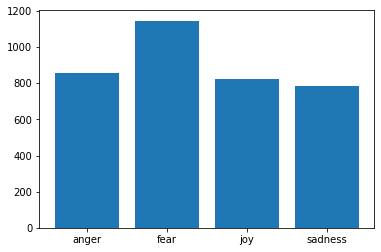

In [10]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_train = [train_anger.shape[0], train_fear.shape[0], train_joy.shape[0], train_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_train,tick_label=labels)
plt.show()

In [11]:
directory2 = 'data/dev'
paths2 = listdir(directory2)
paths2.sort()
paths2

dev_anger = pd.read_csv('%s/%s' %(directory2,paths2[0]), delimiter='\t',header=None)
dev_anger.columns = train_anger.columns
dev_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708
5,10862,Sometimes I get mad over something so minuscul...,anger,0.646
6,10863,I think @Sam_Canaday &amp; @KYLEJDOWSON must a...,anger,0.250
7,10864,My eyes have been dilated. I hate the world ri...,anger,0.812
8,10865,@huwellwell One chosen by the CLP members! MP ...,anger,0.682
9,10866,@huwellwell One chosen by the CLP members! MP ...,anger,0.438


In [12]:
dev_fear = pd.read_csv('%s/%s' %(directory2,paths2[1]), delimiter='\t',header=None)
dev_fear.columns = train_anger.columns

dev_joy = pd.read_csv('%s/%s' %(directory2,paths2[2]), delimiter='\t',header=None) 
dev_joy.columns = train_anger.columns

dev_sadness = pd.read_csv('%s/%s' %(directory2,paths2[3]), delimiter='\t',header=None) 
dev_sadness.columns = train_anger.columns

In [13]:
# check if there are any duplicates(subset = all of the columns)

assert dev_fear.duplicated().sum() == 0
assert dev_anger.duplicated().sum() == 0
assert dev_joy.duplicated().sum() == 0
assert dev_sadness.duplicated().sum() == 0

In [14]:
# checking missing data & len(train),len(test)
print(dev_fear.info(), dev_fear.info(), dev_joy.info(), dev_sadness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   110 non-null    int64  
 1   Tweet    110 non-null    object 
 2   Emotion  110 non-null    object 
 3   Rating   110 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   110 non-null    int64  
 1   Tweet    110 non-null    object 
 2   Emotion  110 non-null    object 
 3   Rating   110 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   79 non-null     int6

In [15]:
print(dev_anger.describe(), "\n", dev_fear.describe(), "\n", dev_joy.describe(), "\n", dev_sadness.describe() )

             SentID     Rating
count     84.000000  84.000000
mean   10898.500000   0.489607
std       24.392622   0.156768
min    10857.000000   0.125000
25%    10877.750000   0.410250
50%    10898.500000   0.500000
75%    10919.250000   0.590500
max    10940.000000   0.860000 
              SentID      Rating
count    110.000000  110.000000
mean   21201.500000    0.489309
std       31.898276    0.185675
min    21147.000000    0.060000
25%    21174.250000    0.354000
50%    21201.500000    0.466500
75%    21228.750000    0.632500
max    21256.000000    0.896000 
              SentID     Rating
count     79.000000  79.000000
mean   30862.000000   0.483392
std       22.949219   0.219682
min    30823.000000   0.038000
25%    30842.500000   0.312000
50%    30862.000000   0.479000
75%    30881.500000   0.653000
max    30901.000000   0.936000 
              SentID     Rating
count     74.000000  74.000000
mean   40822.500000   0.475743
std       21.505813   0.178436
min    40786.000000   0.

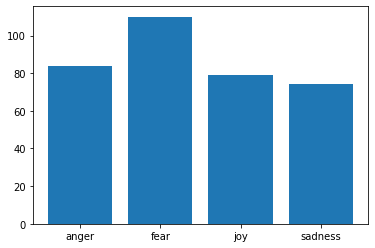

In [16]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_dev = [dev_anger.shape[0], dev_fear.shape[0], dev_joy.shape[0], dev_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_dev,tick_label=labels)
plt.show()

In [17]:
directory3 = 'data/test'
paths3 = listdir(directory3)
paths3.sort()
paths3

test_anger = pd.read_csv('%s/%s' %(directory3,paths3[0]), delimiter='\t',header=None)
test_anger.columns = train_anger.columns

test_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
6,10947,wanna go home and focus up on this game . Don'...,anger,0.375
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625
8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396
9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250


In [18]:
test_fear = pd.read_csv('%s/%s' %(directory3,paths3[1]), delimiter='\t',header=None)
test_fear.columns = train_anger.columns

test_joy = pd.read_csv('%s/%s' %(directory3,paths3[2]), delimiter='\t',header=None) 
test_joy.columns = train_anger.columns

test_sadness = pd.read_csv('%s/%s' %(directory3,paths3[3]), delimiter='\t',header=None) 
test_sadness.columns = train_anger.columns

In [19]:
# check if there are any duplicates(subset = all of the columns)

assert test_fear.duplicated().sum() == 0
assert test_anger.duplicated().sum() == 0
assert test_joy.duplicated().sum() == 0
assert test_sadness.duplicated().sum() == 0

In [20]:
print(test_anger.describe(), "\n", test_fear.describe(), "\n", test_joy.describe(), "\n", test_sadness.describe() )

             SentID      Rating
count    760.000000  760.000000
mean   11320.500000    0.502149
std      219.537392    0.171886
min    10941.000000    0.032000
25%    11130.750000    0.375000
50%    11320.500000    0.496000
75%    11510.250000    0.625000
max    11700.000000    0.976000 
             SentID     Rating
count    995.00000  995.00000
mean   21754.00000    0.50247
std      287.37606    0.20094
min    21257.00000    0.06200
25%    21505.50000    0.35400
50%    21754.00000    0.50000
75%    22002.50000    0.64600
max    22251.00000    1.00000 
              SentID      Rating
count    714.000000  714.000000
mean   31258.500000    0.508958
std      206.258333    0.217295
min    30902.000000    0.000000
25%    31080.250000    0.340000
50%    31258.500000    0.500000
75%    31436.750000    0.673000
max    31615.000000    0.980000 
             SentID      Rating
count    673.00000  673.000000
mean   41196.00000    0.511272
std      194.42265    0.202737
min    40860.00000    0.

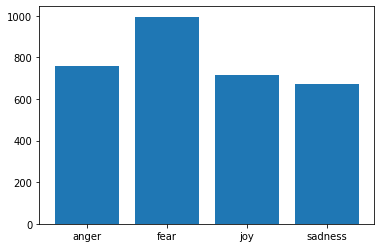

In [21]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_test = [test_anger.shape[0], test_fear.shape[0], test_joy.shape[0], test_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_test,tick_label=labels)
plt.show()

In [22]:
# show the number of instances in the Tweet Emotion Intensity dataset.

Table_1 = pd.DataFrame(np.array([(d_train), (d_dev), (d_test)])).T
Table_1.columns = ['Train', 'Dev.', 'Test']
Table_1.index = ['anger', 'fear', 'joy', 'sadness']
Table_1['All'] = Table_1.apply(lambda x: x.sum(), axis=1)
Table_1.loc['All'] = Table_1.apply(lambda x: x.sum())

Table_1

,Train,Dev.,Test,All
anger,857,84,760,1701
fear,1147,110,995,2252
joy,823,79,714,1616
sadness,786,74,673,1533
All,3613,347,3142,7102


In [23]:
# plan to train models on the combined training and development sets
train = pd.concat([train_anger, train_fear, train_joy, train_sadness, dev_anger, dev_fear, dev_joy, dev_sadness],axis=0,ignore_index=True)
train

,SentID,Tweet,Emotion,Rating
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3955,40855,Common app just randomly logged me out as I wa...,sadness,0.833
3956,40856,"I'd rather laugh with the rarest genius, in be...",sadness,0.688
3957,40857,If you #invest in my new #film I will stop ask...,sadness,0.458
3958,40858,"Just watched Django Unchained, Other people ma...",sadness,0.333


In [24]:
test = pd.concat([test_anger, test_fear, test_joy, test_sadness],axis=0,ignore_index=True)
test

,SentID,Tweet,Emotion,Rating
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
...,...,...,...,...
3137,41528,Why does Candice constantly pout #GBBO 💄😒,sadness,0.396
3138,41529,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness,0.604
3139,41530,"@AceOperative789 no pull him afew weeks ago, s...",sadness,0.479
3140,41531,I'm buying art supplies and I'm debating how s...,sadness,0.375


# (2) Define Text Data Cleaning Process

In [25]:
import string
import re

from nltk.corpus import stopwords
from nltk import bigrams

import wordsegment as ws # $ pip install wordsegment    
ws.load()     

import emoji  # $ pip install emoji

# As the glove model contains many words made with grammatical role, tense ,or derivational morphology,
# we do not need WordNetLemmatizer or SnowballStemmer here.

In [26]:
def normalize_text(text):
    
    # replace emoji to word
    # text = emoji.demojize(text)
    
    # remove characters outside the ascii code 128
    # text = ''.join([w if ord(w)<128 else ' ' for w in text])
    
    # replace '--' with a space
    text = text.replace('--',' ')
    
    # remove any newline characters
    text = text.replace('\n',' ')
    
    # tweets mentions user using '@' followed by username. Replace all those with <user> to be usable for Glove
    text = re.sub('@[^ ]+','<user>',text)
    
    # Replace all URLs with <url> to be usable for Glove
    text = re.sub(r'\d+','<number>',text)
   
    # Replace all numbers with <number> to be usable for Glove
    text = re.sub(r'http\S+','<url>',text)
    
    # turn some abbreviations into a whold word
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"fu\*k", " fuck", text)
    text = re.sub(r"f\*c+", "fuck", text)
    text = text.replace("wtf", "what the fuck")
    
    # prepare spaces between punctuation and words
    text1 = text.split('...')
    for i in range(len(text1)):
        text1[i] = text1[i].replace('/',' / ').replace('\\',' \ ').replace(',',' , ').replace('.',' . ').replace('?',' ? ').replace('!',' ! ').replace("'"," ' ").replace(':',' : ').replace(';',' ; ').replace('-',' - ').replace('(',' ( ').replace(')',' ) ').replace('[',' [ ').replace(']',' ] ').replace('&',' & ').replace('*',' * ').replace('{',' { ').replace('}',' } ').replace('-',' - ').replace('`',' ` ').replace('"',' " ').replace('>','> ').replace('<',' <')
    text1 = ' '.join(text1)
    
    # split into tokens by white space
    tokens = text1.split()
    
    return tokens

def clean_text(text):
   
    tokens = normalize_text(text)
    
    new_tokens1 = []
    for w in tokens:
        if w == "<user>":
            w = w
        elif w == "<url>":
            w = w
        elif w == "<number>":
            w = w
        elif w in emoji.UNICODE_EMOJI:
            w = w
        else:
            # prepare regex for char filtering: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
            re_punc = re.compile('[%s]' %re.escape(string.punctuation))
            # remove punctuation from each word
            w = re_punc.sub('', w)
    
            # remove remaining tokens that are not alphabetic
            if w.isalpha():
                w = w
        new_tokens1.append(w) 
        
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in new_tokens1 if not w in stop_words]
    
    new_tokens2 = []
    for w in tokens:
        if w == "<user>":
            w = w
        elif w == "<url>":
            w = w
        elif w == "<number>":
            w = w
        elif w in emoji.UNICODE_EMOJI:
            w = w
        else:
            # word segment will convert the hashtag based joined words, for example, it will segment #iamthebest to ['i','am','the','best']
            w = ' '.join(ws.segment(w)) 
        new_tokens2.append(w)
        
    
    # make lower case
    tokens = [word.lower() for word in new_tokens2]
    
    
    clean_text = ' '.join(tokens)
    tokens = clean_text.split()
    
    new_tokens3 = []   
    # filter out short tokens
    for w in tokens:
        if w in emoji.UNICODE_EMOJI:
            w = w
        else:
            if len(w) > 1:
                w =w
        new_tokens3.append(w)
    
    return ' '.join(new_tokens3)

In [27]:
# do a sanity check
text = "@laura221b I've left it for my dad to deal with 😂 My work is done as soon as it's felt the wrath of my slipper 😷"
clean_text(text)

'<user> i left dad deal 😂 my work done soon felt wrath slipper 😷'

In [28]:
# prepare for clean Hashtag Emotion Intensity Lexicons...

def remove_stopwords(string):
    split_string = \
        [word for word in string.split()
         if word not in stopwords.words('english')]
    
    return " ".join(split_string)

def clean_str(string):  
    string = string.replace("\\n", " ")
    string = string.replace("_NEG", "")
    string = string.replace("_NEGFIRST", "")
    string = re.sub(r"@[A-Za-z0-9_s(),!?\'\`]+", "", string) # removing any twitter handle mentions

    string = re.sub(r"#", "", string)
    string = re.sub(r"\*", "", string)
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " !", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " ?", string)
    string = re.sub(r"\s{2,}", " ", string)

    return remove_stopwords(string.strip().lower())

# (3) Clean Text Data

In [29]:
train['Tweet'] = train['Tweet'].apply(clean_text)

test['Tweet'] = test['Tweet'].apply(clean_text)

In [30]:
# do a sanity check
train[0:55]

,SentID,Tweet,Emotion,Rating
0,10000,how fuck who heck moved fridge i knock landlor...,anger,0.938
1,10001,so indian uber driver called someone n word if...,anger,0.896
2,10002,<user> i asked parcel delivered pick store add...,anger,0.896
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,10004,do join <user> put phone talk rude taking mone...,anger,0.896
5,10005,my blood boiling,anger,0.875
6,10006,when still got whole season wentworth watch st...,anger,0.875
7,10007,<user> tracking show equipment delivered why s...,anger,0.875
8,10008,<user> legit furious people fucking idiots,anger,0.875
9,10009,how suppose work wtf dude thanks pissing,anger,0.875


In [31]:
train.to_csv("train_clean.csv")
test.to_csv("test_clean.csv")

In [32]:
# show the distribution of text length (from below: there is no need to truncate any of texts)
def show_text_len(train):
    train["text_len"] = train['Tweet'].map(lambda x: len(x.split()))
    return train["text_len"]

In [33]:
show_text_len(train).describe()

count    3960.000000
mean       11.151263
std         4.659846
min         1.000000
25%         7.000000
50%        11.000000
75%        15.000000
max        32.000000
Name: text_len, dtype: float64

In [34]:
show_text_len(test).describe()

count    3142.000000
mean       11.172502
std         4.652404
min         1.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        31.000000
Name: text_len, dtype: float64

There is not any reviews' length = 0 after text cleaning

In [35]:
train_tweets = list(train['Tweet'])
train_intensities = list(train['Rating'])

In [36]:
# check
train_tweets[:100]

['how fuck who heck moved fridge i knock landlord door angry mad',
 'so indian uber driver called someone n word if i moving vehicle i would jumped disgusted',
 '<user> i asked parcel delivered pick store address fuming poor customer service',
 'ef whichever butt wipe pulled fire alarm davis bc i sound asleep pissed angry upset tired sad tired h angry',
 'do join <user> put phone talk rude taking money acc willy nilly fuming',
 'my blood boiling',
 'when still got whole season wentworth watch stupid cunt work ruins us <user> raging old cunt',
 '<user> tracking show equipment delivered why service suddenly delayed we already <number> weeks fuming',
 '<user> legit furious people fucking idiots',
 'how suppose work wtf dude thanks pissing',
 'im mad power rangers im incensed im furious',
 'wont use using <user> <user> these guys cant get nothing right fuming',
 'bitches aggravate like inspires biggest cunt known man kind',
 'why <user> come glasgow night i working i fucking gutted waiting

In [37]:
# check
train_intensities[:10]

[0.938,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875]

In [38]:
test_tweets = list(test['Tweet'])
test_intensities = list(test['Rating'])

In [39]:
# show Max Text Length of All Datasets for comparsion

all_tweets_max_len = pd.DataFrame(np.array([max(show_text_len(train)), max(show_text_len(test))]))

all_tweets_max_len.index = ['train', 'test']
all_tweets_max_len.columns = ['max text length']

all_tweets_max_len

,max text length
train,32
test,31


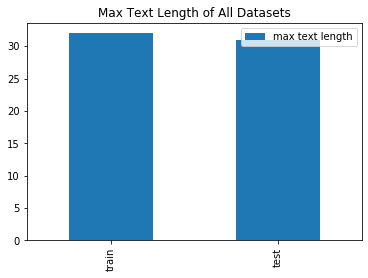

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
all_tweets_max_len.plot(kind='bar')
plt.title('Max Text Length of All Datasets')
plt.show()

In [41]:
'''
we set the length to which each tweet vector will be zero padded to.
this is based on the maximum length we got on the training set - we do not want to remove
any words as the maximun length of the training set is not very big.
'''

max_len = max(show_text_len(train))
max_len

32

# 2. Text Data Preparation（Feature Extraction)

# (1) Load Pre-trained Word Vectors

In [42]:
import numpy as np
import gensim
from nltk import word_tokenize

In [43]:
word_vector_path = "files/wv_models/"

# 1) Glove

# 2) Word2Vec

# 3) Define Averaged Word Embeddings

# (2) Load Lexicon Feature Vectors

In [44]:
import json
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

lexicons_path = "files/lexicons/"

In [45]:
paths2 = listdir(lexicons_path)
paths2.sort()
paths2

['0.Emoji_Vectors',
 '1.NRC-Emotion-Intensity-Lexicon',
 '3.NRC-Emotion-Lexicon',
 '4.NRC-Hashtag-Emotion-Lexicon',
 '5.NRC-Emoticon-Lexicon',
 '6.NRC-Emoticon-AffLexNegLex',
 '7.NRC-Hashtag-Sentiment-AffLexNegLex',
 '8.NRC-Hashtag-Sentiment-Lexicon',
 '9.DepecheMood_V1.0']

# (3) Prepare Sentence Vectors as Inputs

In [46]:
feature_index_mapping = \
    {
        0: "Glove[Twitter]",
        1: "Word2Vec[Twitter]",
        2: "NRC-Emotion Intensity Lexicon",
        3: "Wordnet-Affect",
        4: "NRC-Emotion-Lexicon",
        5: "NRC-Emoticon-Lexicon",
        6: "NRC-Emoticon-AffLexNegLex",
        7: "NRC-Hashtag-Emotion",
        8: "NRC-Hashtag-Sentiment-Lexicon",
        9: "NRC-Hashtag-Sentiment-AffLexNegLex",
        10: "Emoji Intensity",
        11: "Depeche Mood"
    
    }


def get_features_from_identifier(bin_string):
    features = list()
    for i in range(len(bin_string)):
        if int(bin_string[i]):
            features.append(feature_index_mapping[i])

    return features

In [47]:
string1 = "110011001010"
get_features_from_identifier(string1)

['Glove[Twitter]',
 'Word2Vec[Twitter]',
 'NRC-Emotion-Lexicon',
 'NRC-Emoticon-Lexicon',
 'NRC-Hashtag-Sentiment-Lexicon',
 'Emoji Intensity']

In [48]:
# restore vectors
import pickle
x_train_vectors_path_a = "files/" + "anger" + "_vectors/x_train.npy"
y_train_vectors_path_a = "files/" + "anger" + "_vectors/y_train.npy"

x_test_vectors_path_a = "files/" + "anger" + "_vectors/x_test.npy"
y_test_vectors_path_a = "files/" + "anger" + "_vectors/y_test.npy"

# Restore vectors
with open(x_train_vectors_path_a, 'rb') as x_train_vectors_file_a:
    x_train_a = pickle.load(x_train_vectors_file_a)
with open(y_train_vectors_path_a, 'rb') as y_train_vectors_file_a:
    score_train_a = pickle.load(y_train_vectors_file_a)

with open(x_test_vectors_path_a, 'rb') as x_test_vectors_file_a:
    x_test_a = pickle.load(x_test_vectors_file_a)
with open(y_test_vectors_path_a, 'rb') as y_test_vectors_file_a:
    test_intensities_a = pickle.load(y_test_vectors_file_a)

In [49]:
x_train_vectors_path_f = "files/" + "fear" + "_vectors/x_train.npy"
y_train_vectors_path_f = "files/" + "fear" + "_vectors/y_train.npy"

x_test_vectors_path_f = "files/" + "fear" + "_vectors/x_test.npy"
y_test_vectors_path_f = "files/" + "fear" + "_vectors/y_test.npy"

# Restore vectors
with open(x_train_vectors_path_f, 'rb') as x_train_vectors_file_f:
    x_train_f = pickle.load(x_train_vectors_file_f)
with open(y_train_vectors_path_f, 'rb') as y_train_vectors_file_f:
    score_train_f = pickle.load(y_train_vectors_file_f)

with open(x_test_vectors_path_f, 'rb') as x_test_vectors_file_f:
    x_test_f = pickle.load(x_test_vectors_file_f)
with open(y_test_vectors_path_f, 'rb') as y_test_vectors_file_f:
    test_intensities_f = pickle.load(y_test_vectors_file_f)

In [50]:
x_train_vectors_path_j = "files/" + "joy" + "_vectors/x_train.npy"
y_train_vectors_path_j = "files/" + "joy" + "_vectors/y_train.npy"

x_test_vectors_path_j = "files/" + "joy" + "_vectors/x_test.npy"
y_test_vectors_path_j = "files/" + "joy" + "_vectors/y_test.npy"

# Restore vectors
with open(x_train_vectors_path_j, 'rb') as x_train_vectors_file_j:
    x_train_j = pickle.load(x_train_vectors_file_j)
with open(y_train_vectors_path_j, 'rb') as y_train_vectors_file_j:
    score_train_j = pickle.load(y_train_vectors_file_j)

with open(x_test_vectors_path_j, 'rb') as x_test_vectors_file_j:
    x_test_j = pickle.load(x_test_vectors_file_j)
with open(y_test_vectors_path_j, 'rb') as y_test_vectors_file_j:
    test_intensities_j = pickle.load(y_test_vectors_file_j)

In [51]:
x_train_vectors_path_s = "files/" + "sadness" + "_vectors/x_train.npy"
y_train_vectors_path_s = "files/" + "sadness" + "_vectors/y_train.npy"

x_test_vectors_path_s = "files/" + "sadness" + "_vectors/x_test.npy"
y_test_vectors_path_s = "files/" + "sadness" + "_vectors/y_test.npy"

# Restore vectors
with open(x_train_vectors_path_s, 'rb') as x_train_vectors_file_s:
    x_train_s = pickle.load(x_train_vectors_file_s)
with open(y_train_vectors_path_s, 'rb') as y_train_vectors_file_s:
    score_train_s = pickle.load(y_train_vectors_file_s)

with open(x_test_vectors_path_s, 'rb') as x_test_vectors_file_s:
    x_test_s = pickle.load(x_test_vectors_file_s)
with open(y_test_vectors_path_s, 'rb') as y_test_vectors_file_s:
    test_intensities_s = pickle.load(y_test_vectors_file_s)

In [52]:
x_train = np.concatenate((x_train_a, x_train_f, x_train_j, x_train_s),axis=0)
score_train = np.concatenate((score_train_a, score_train_f, score_train_j, score_train_s),axis=0)

x_test = np.concatenate((x_test_a, x_test_f, x_test_j, x_test_s),axis=0)
test_intensities = np.concatenate((test_intensities_a, test_intensities_f, test_intensities_j, test_intensities_s),axis=0)

In [53]:
x_train = np.array(x_train)
score_train = np.array(score_train)

x_test = np.array(x_test)
test_intensities = np.array(test_intensities)

In [54]:
print(x_train.shape,'\n',score_train.shape,'\n',x_test.shape, '\n', test_intensities.shape)

(3960, 943) 
 (3960,) 
 (3142, 943) 
 (3142,)


# 3. Train a model

In [55]:
import time

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import scipy

import torch

In [56]:
def evaluate_lists(pred, gold):
    if len(pred) == len(gold):
        gold_scores=gold
        pred_scores=pred         
        
        # lists storing gold and prediction scores where gold score >= 0.5
        gold_scores_range_05_1=[]
        pred_scores_range_05_1=[]
         
            
        for i in range(len(gold_scores)):
            if(gold_scores[i]>=0.5):
                gold_scores_range_05_1.append(gold_scores[i])
                pred_scores_range_05_1.append(pred_scores[i])
                
        # return zero correlation if predictions are constant
        if np.std(pred_scores)==0 or np.std(gold_scores)==0:
            return (0,0,0,0)
        
        pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]                                    
        spear_corr=scipy.stats.spearmanr(pred_scores,gold_scores)[0]   


        pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]                                    
        spear_corr_range_05_1=scipy.stats.spearmanr(pred_scores_range_05_1,gold_scores_range_05_1)[0]           
        
      
        return np.array([pears_corr,spear_corr,pears_corr_range_05_1,spear_corr_range_05_1])
    else:
        raise ValueError('Predictions and gold data have different number of lines.')

# 1) XGBoost

from sklearn.metrics import make_scorer
import scipy
def pearson_score(ground_truth, predictions):
    score = scipy.stats.pearsonr(predictions,ground_truth)[0]
    return score
PS = make_scorer(pearson_score, greater_is_better=True)

In [57]:
from sklearn.model_selection import GridSearchCV
ml_model = XGBRegressor(objective="reg:squarederror",seed=0)

# specify parameters and distributions to sample from
param_dist = {
     "max_depth": range(3, 11),
     "n_estimators": [100,300,500,700,900,1000,3000]
 }


# run randomized search
grid_search = GridSearchCV(ml_model,param_grid=param_dist, cv=5, n_jobs=-1,return_train_score=True)

trainingtime = pd.DataFrame(columns = ["Model", "Training Time(Seconds)"])
start_time_XG =time.time()

grid_search.fit(x_train, score_train)
trainingtime.loc[0] = ["XGBoost", round((time.time()-start_time_XG), 2)] 

In [58]:
grid_search.best_score_

-0.12420807820154423

In [59]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
grid_search.best_estimator_.score(x_train, score_train)

0.9952548222566241

In [61]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,43.634384,0.282468,0.036702,0.001934,3,100,"{'max_depth': 3, 'n_estimators': 100}",-0.197176,-0.321995,-0.108781,...,-0.126679,0.129944,8,0.835538,0.817868,0.830583,0.844545,0.828643,0.831436,0.008733
1,126.557567,0.639876,0.040891,0.000631,3,300,"{'max_depth': 3, 'n_estimators': 300}",-0.270734,-0.339127,-0.094779,...,-0.162855,0.130167,37,0.977920,0.975539,0.975241,0.980315,0.977199,0.977243,0.001833
2,209.358875,0.809662,0.047473,0.000798,3,500,"{'max_depth': 3, 'n_estimators': 500}",-0.279772,-0.347723,-0.092022,...,-0.167663,0.130844,38,0.992700,0.991723,0.991282,0.994318,0.993220,0.992648,0.001081
3,291.529469,0.897455,0.054255,0.000489,3,700,"{'max_depth': 3, 'n_estimators': 700}",-0.282062,-0.348249,-0.091495,...,-0.169031,0.131161,39,0.995106,0.994209,0.993924,0.996698,0.995806,0.995149,0.001022
4,374.562814,1.168611,0.060438,0.001017,3,900,"{'max_depth': 3, 'n_estimators': 900}",-0.284930,-0.349409,-0.090884,...,-0.170109,0.131563,49,0.995648,0.994687,0.994493,0.997277,0.996372,0.995696,0.001041
5,416.770240,1.141784,0.063829,0.001262,3,1000,"{'max_depth': 3, 'n_estimators': 1000}",-0.285458,-0.348756,-0.090279,...,-0.170055,0.131541,48,0.995734,0.994823,0.994616,0.997484,0.996463,0.995824,0.001062
6,776.163539,10.371495,0.082180,0.002239,3,3000,"{'max_depth': 3, 'n_estimators': 3000}",-0.285685,-0.348937,-0.089587,...,-0.169984,0.131711,47,0.995820,0.994942,0.994734,0.997654,0.996541,0.995938,0.001073
7,56.664817,0.454116,0.034907,0.000631,4,100,"{'max_depth': 4, 'n_estimators': 100}",-0.307987,-0.304382,-0.139305,...,-0.179244,0.109870,50,0.953181,0.951826,0.949443,0.956145,0.949301,0.951979,0.002547
8,167.672086,0.753504,0.044282,0.000489,4,300,"{'max_depth': 4, 'n_estimators': 300}",-0.351883,-0.316304,-0.137121,...,-0.197850,0.117982,56,0.995026,0.994117,0.993815,0.996672,0.995455,0.995017,0.001018
9,277.745907,1.168311,0.053657,0.000746,4,500,"{'max_depth': 4, 'n_estimators': 500}",-0.351761,-0.316331,-0.134833,...,-0.197751,0.117934,55,0.995797,0.994913,0.994707,0.997610,0.996515,0.995908,0.001069


In [62]:
grid_search.best_params_

{'max_depth': 9, 'n_estimators': 500}

In [63]:
ml_model_best = grid_search.best_estimator_

ml_model_best.fit(x_train, score_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
from sklearn.model_selection import learning_curve
def plot_learningcurve(classifier, X, y, plt_titile):
    # check whether there is overfitting or underfitting by learning_curve
    # choose five kinds of fraction of the maximum size of the training set: np.linspace(0.1,1.0,5)
    train_size, train_score, test_score = learning_curve(classifier, X, y, cv=5, train_sizes=np.linspace(0.1,1.0,5))
    train_scores_mean = np.mean(train_score, axis=1)
    train_scores_std = np.std(train_score, axis=1)
    test_scores_mean = np.mean(test_score, axis=1)
    test_scores_std = np.std(test_score, axis=1)
    plt.fill_between(train_size, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_size, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_size, train_scores_mean,'o--', color="r",label="Training score")
    plt.plot(train_size, test_scores_mean,'o-', color="g",label="Testing score")
    plt.grid()
    plt.title(plt_titile)
    plt.legend(loc="best")
    return plt.show()

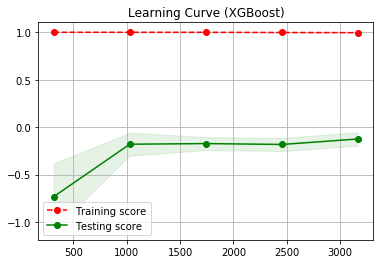

In [65]:
plot_learningcurve(grid_search.best_estimator_, x_train, score_train, 'Learning Curve (XGBoost)')

In [66]:
y_pred = ml_model_best.predict(x_test)

score1_1 = evaluate_lists(y_pred, test_intensities)
score1_1

array([0.41635133, 0.39958636, 0.30618782, 0.2697746 ])

In [67]:
from sklearn.metrics import r2_score

score1_2 = r2_score(test_intensities, y_pred)
score1_2

0.1504697073757073

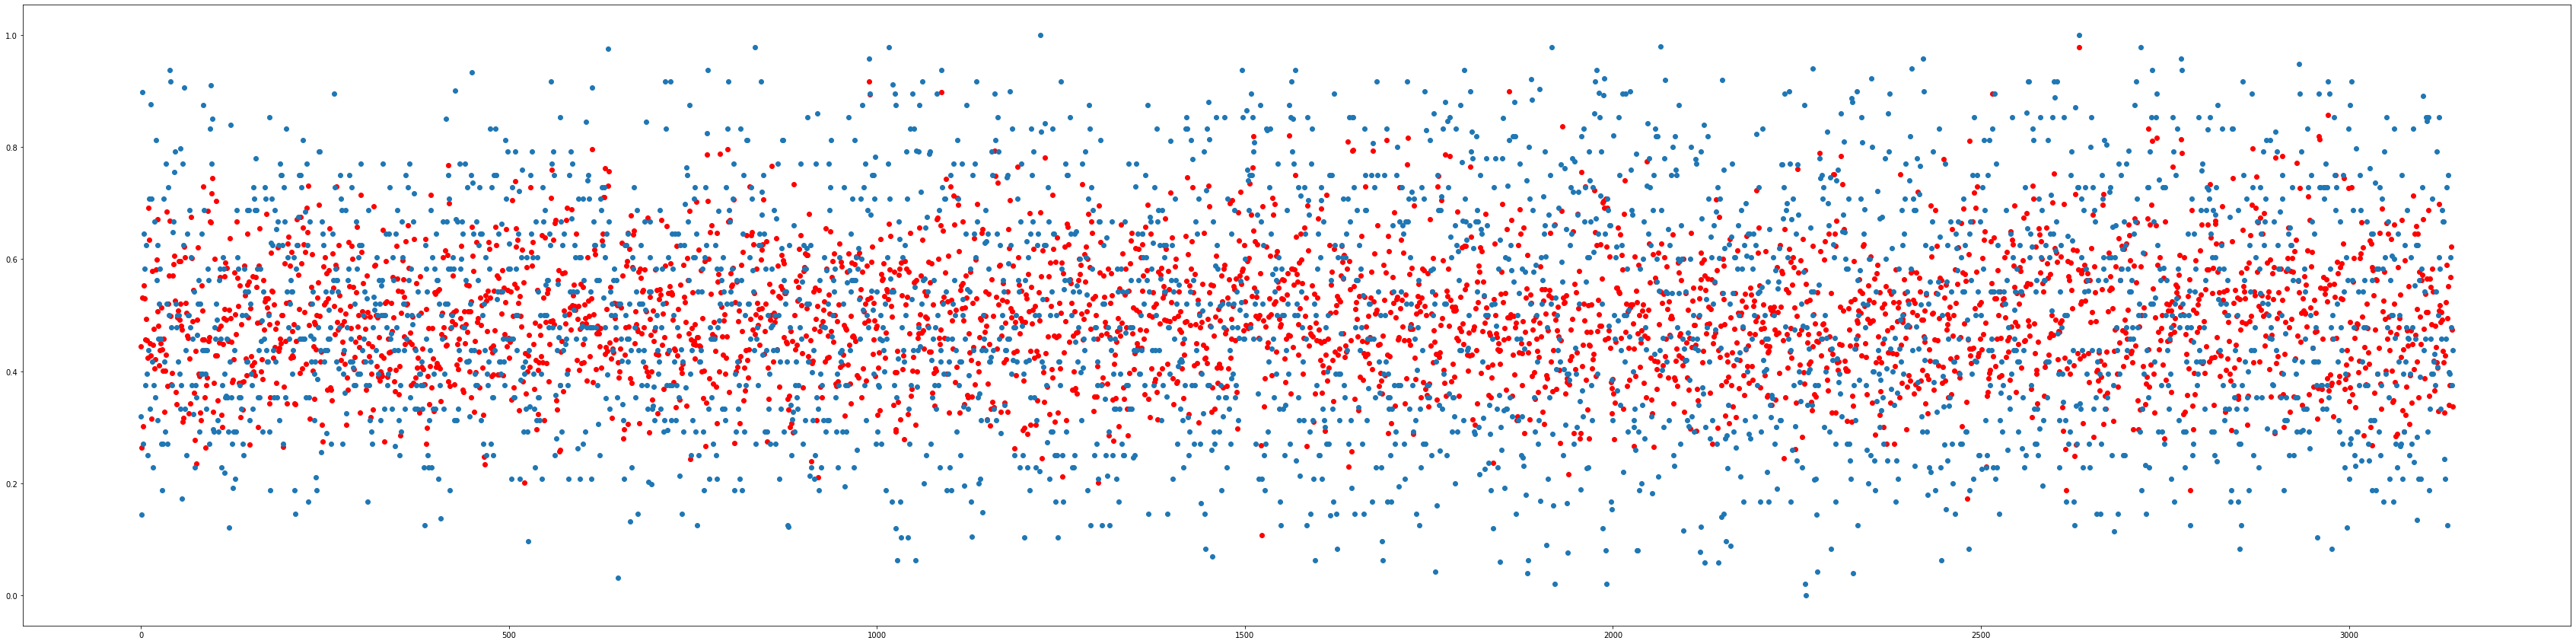

In [68]:
plt.figure(figsize=(60,15))
plt.scatter(range(len(y_pred)),y_pred,c='r')
plt.scatter(range(len(test_intensities)),test_intensities)

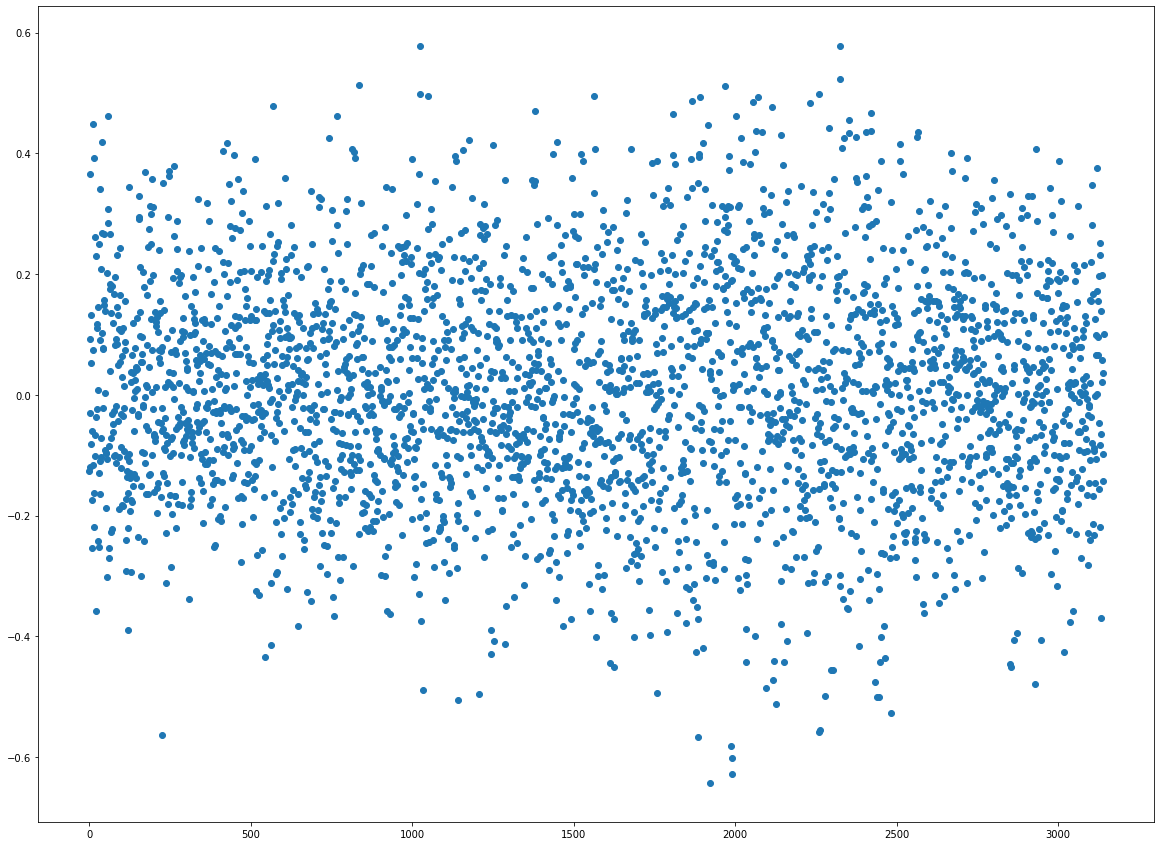

In [69]:
plt.figure(figsize=(20,15))
plt.scatter(range(len(y_pred)),test_intensities-y_pred)

In [70]:
xgboost_path = "files/final_models/" + "xgboost_"+ emotion + ".dat"

In [71]:
import pickle
with open(xgboost_path, 'wb') as xgboost_file:
    pickle.dump(grid_search.best_estimator_, xgboost_file)

In [72]:
#model = pickle.load(open(xgboost_path,'rb'))
#model

# 2) Feedfoward Neural Network

In [73]:
import torch.nn.functional as F

class LinearModel(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(LinearModel,self).__init__() 
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.hidden.weight = torch.nn.init.xavier_normal(self.hidden.weight)
        self.dropout = torch.nn.Dropout(p=0.25)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        out=F.relu(self.hidden(x))
        out=self.dropout(out)
        out=F.sigmoid(self.predict(out))
        return out


In [74]:
import torch.utils.data as Data
batch_size = 128
dataset = Data.TensorDataset(torch.tensor(x_train.astype(np.float32)), torch.tensor(score_train.astype(np.float32)))
data_iter = Data.DataLoader(dataset = dataset,batch_size = batch_size, shuffle = True, num_workers = 2)

for X,y in data_iter:
    print(X, '\n', y)
    break

tensor([[ 0.2711,  0.0229,  0.0254,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1131,  0.0130, -0.0302,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2686, -0.0985, -0.1744,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.1048,  0.0627, -0.0280,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0097,  0.2081, -0.3967,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2926,  0.0182,  0.0150,  ...,  0.0000,  0.0000,  0.0000]]) 
 tensor([0.5420, 0.1670, 0.5420, 0.3330, 0.3120, 0.6040, 0.5620, 0.4380, 0.4380,
        0.6460, 0.5000, 0.8770, 0.4580, 0.1250, 0.6750, 0.8960, 0.2200, 0.4170,
        0.8960, 0.4790, 0.1770, 0.6880, 0.1250, 0.5830, 0.3960, 0.9580, 0.5210,
        0.4380, 0.6040, 0.5660, 0.7710, 0.2800, 0.6250, 0.2080, 0.3600, 0.3120,
        0.3750, 0.3750, 0.4170, 0.3960, 0.6300, 0.4580, 0.3960, 0.4200, 0.5000,
        0.3960, 0.5380, 0.1610, 0.7710, 0.8200, 0.1200, 0.3750, 0.5830, 0.3960,
        0.0880, 0.3750, 0.7290, 0.6460, 0.5000, 0.8540, 0.3120, 0.6880, 0.4790,
    

In [75]:
# architecure: 1→10000→1
net = LinearModel(x_train.shape[1],10000,1)
print(net)
print(net.parameters())    

LinearModel(
  (hidden): Linear(in_features=943, out_features=10000, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (predict): Linear(in_features=10000, out_features=1, bias=True)
)
<generator object Module.parameters at 0x00000147C7E951A8>


C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  import sys


In [76]:
para = list(net.parameters())
print(para)

[Parameter containing:
tensor([[ 0.0135, -0.0113, -0.0158,  ...,  0.0137,  0.0057, -0.0153],
        [-0.0097,  0.0038,  0.0075,  ...,  0.0161,  0.0041,  0.0068],
        [-0.0302, -0.0135, -0.0302,  ...,  0.0184,  0.0112,  0.0018],
        ...,
        [-0.0164,  0.0076,  0.0041,  ...,  0.0079, -0.0092, -0.0003],
        [ 0.0167, -0.0128, -0.0076,  ...,  0.0150,  0.0213, -0.0234],
        [-0.0087, -0.0023,  0.0154,  ..., -0.0093,  0.0210, -0.0019]],
       requires_grad=True), Parameter containing:
tensor([ 0.0230,  0.0141, -0.0292,  ..., -0.0159, -0.0077, -0.0263],
       requires_grad=True), Parameter containing:
tensor([[ 0.0037,  0.0097, -0.0026,  ..., -0.0028, -0.0027, -0.0057]],
       requires_grad=True), Parameter containing:
tensor([0.0075], requires_grad=True)]


In [77]:
optimizer = torch.optim.Adam(net.parameters())
print(optimizer)

loss_func = torch.nn.MSELoss()

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [78]:
dataset_test = Data.TensorDataset(torch.tensor(x_test.astype(np.float32)), torch.tensor(test_intensities.astype(np.float32)))
data_iter_test = Data.DataLoader(dataset = dataset_test,batch_size = batch_size, num_workers = 2)

In [79]:
# Train the model


start_time_NN =time.time()

train_losses = []

test_losses = []

num_epochs = 1000
train_interval = 10
test_interval = 10

for epoch in range(num_epochs):
    net.train()
    for X,y in data_iter:
        prediction = net(X)
        loss = loss_func(prediction,y.view(-1,1))
    
    # reset gradient, equal to net.zero_grad()
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
        
        

    if((epoch+1)%train_interval==0):
        print("epoch{},train_loss{}".format(epoch+1,loss.data))
        train_losses.append(loss.item())
   

      
    net.eval()
    with torch.no_grad():
        
        for X_test, y_test in data_iter_test:
            
            prediction1 = net(X_test)
            loss1 = loss_func(prediction1, y_test.view(-1,1))
            
    if ((epoch+1) % test_interval == 0):       
        print("epoch{},test_loss{}".format(epoch+1,loss1.data))
        #test_loss += float(loss1.item())
        test_losses.append(loss1.item())
        
trainingtime.loc[1] = ["Simple Neural Network", round((time.time()-start_time_NN), 2)]

C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch10,train_loss0.01152859814465046
epoch10,test_loss0.023009568452835083
epoch20,train_loss0.006612476427108049
epoch20,test_loss0.02463933825492859
epoch30,train_loss0.0033974614925682545
epoch30,test_loss0.02392236329615116
epoch40,train_loss0.0026293776463717222
epoch40,test_loss0.025311056524515152
epoch50,train_loss0.0033080189023166895
epoch50,test_loss0.024479150772094727
epoch60,train_loss0.0016118090134114027
epoch60,test_loss0.024791168048977852
epoch70,train_loss0.0023285874631255865
epoch70,test_loss0.022709624841809273
epoch80,train_loss0.0009666154510341585
epoch80,test_loss0.023991931229829788
epoch90,train_loss0.0015478002605959773
epoch90,test_loss0.023345481604337692
epoch100,train_loss0.0017336588352918625
epoch100,test_loss0.023466914892196655
epoch110,train_loss0.0018464350141584873
epoch110,test_loss0.022537529468536377
epoch120,train_loss0.0013577586505562067
epoch120,test_loss0.02380162850022316
epoch130,train_loss0.0013930430868640542
epoch130,test_loss0.023

In [80]:
train_x = range(len(train_losses))
train_y = train_losses

train_iters = len(data_iter)
#test_x = np.arange(1, len(test_losses)+1) * train_iters*test_interval 
test_x = range(len(test_losses))
test_y = test_losses


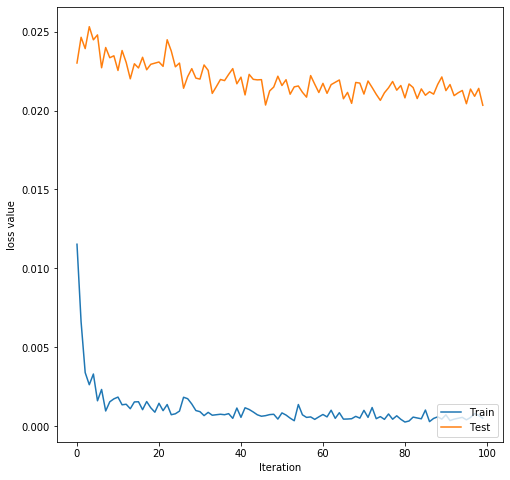

In [81]:
plt.figure(figsize=(8,8))
plt.plot(train_x, train_y, label='Train')
plt.plot(test_x, test_y, label='Test')
plt.legend(loc='lower right')
plt.ylabel('loss value')
plt.xlabel('Iteration')
plt.show()

In [82]:
y_pred_tensor = net(torch.tensor(x_test.astype(np.float32)))
# len(y_pred)
y_pred_array = y_pred_tensor.detach().numpy()
y_pred_a = np.concatenate((y_pred_array), axis=None)
y_pred_a.shape

(3142,)

In [83]:
score2_1 = evaluate_lists(y_pred_a, test_intensities)
score2_1

array([0.52182067, 0.51973364, 0.40034827, 0.38268955])

In [84]:
from sklearn.metrics import r2_score

score2_2 = r2_score(test_intensities, y_pred_a)
score2_2

0.21940213371430517

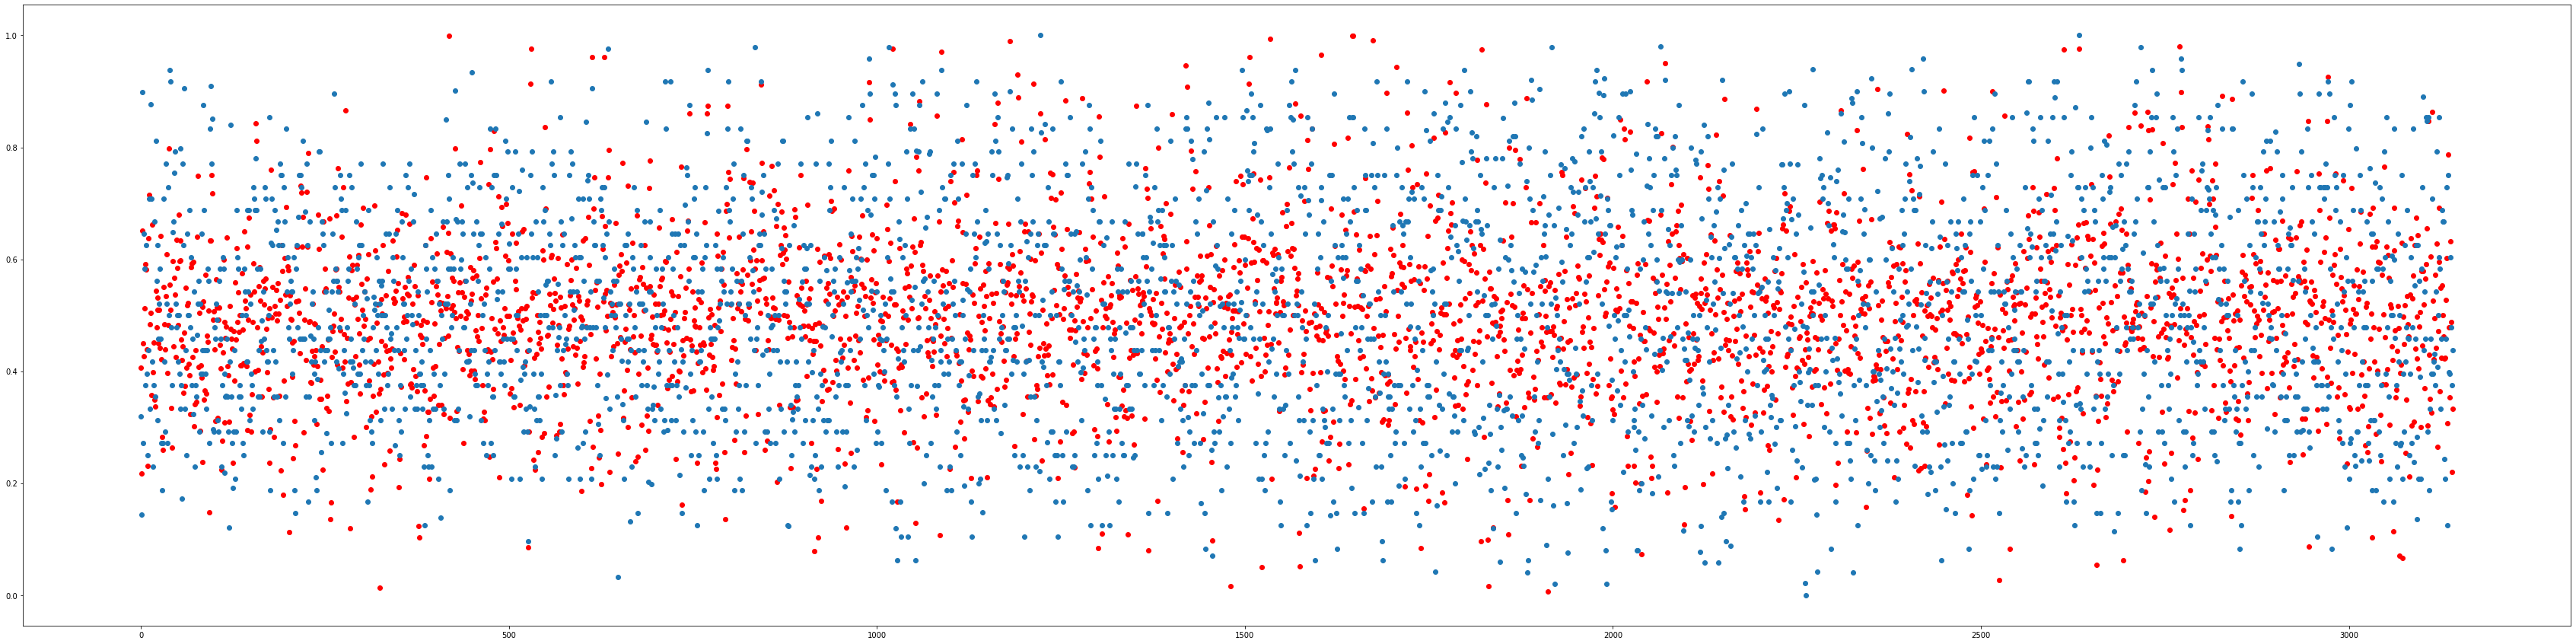

In [85]:
plt.figure(figsize=(60,15))
plt.scatter(range(len(y_pred_a)),y_pred_a,c='r')
plt.scatter(range(len(test_intensities)),test_intensities)

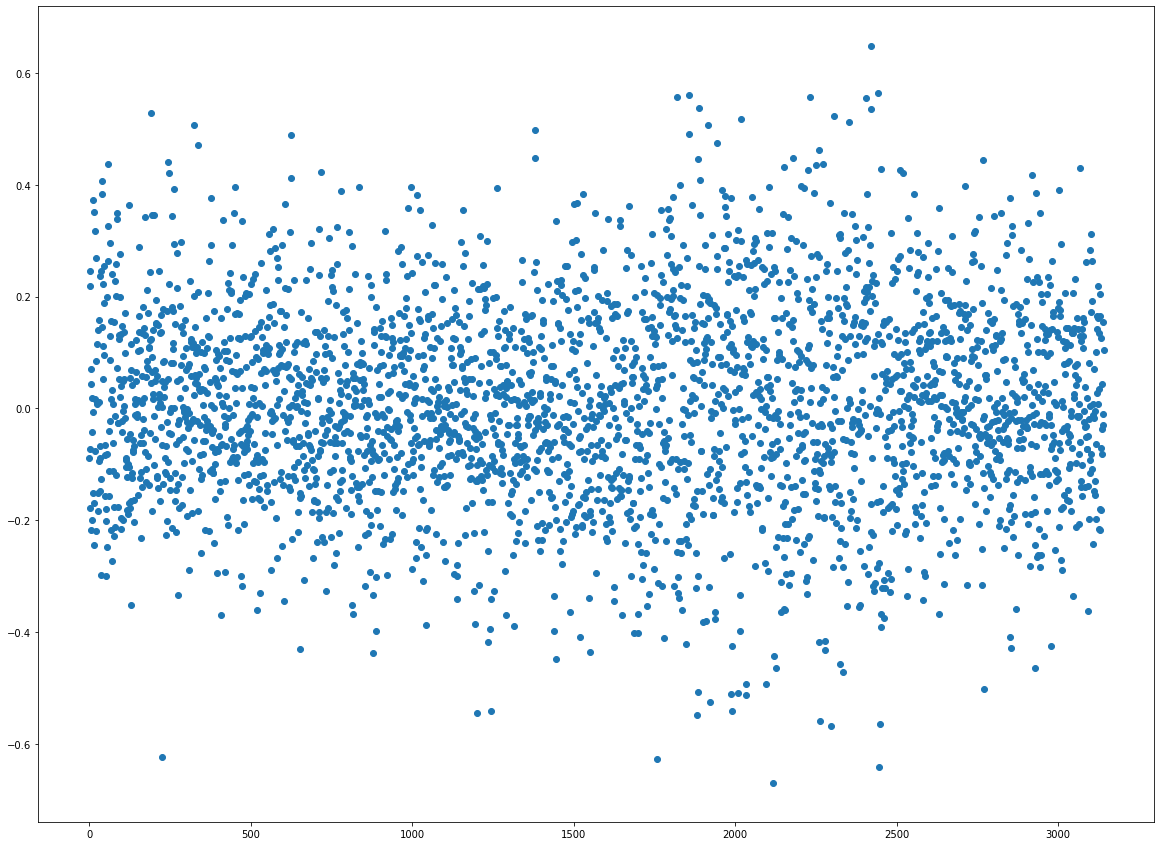

In [86]:
plt.figure(figsize=(20,15))
plt.scatter(range(len(y_pred_a)),test_intensities-y_pred_a)

In [87]:
simple_neural_network_path = "files/final_models/" + "simpleNN_"+ emotion + ".pkl.tar"
simple_neural_network_path

'files/final_models/simpleNN_whole.pkl.tar'

In [88]:
#torch.save(net, simple_neural_network_path) 
torch.save({'state_dict': net.state_dict()}, simple_neural_network_path)

# 4. Compare the Performance and Training Time Results

In [89]:
trainingtime

,Model,Training Time(Seconds)
0,XGBoost,5843.99
1,Simple Neural Network,8065.11


In [90]:
trainingtime.to_csv("training_time_"+emotion+".csv",mode='w')

In [91]:
all_score = pd.DataFrame(data = [score1_1,score2_1], columns = ['pears-corr','spear-corr','pears-corr-range-05-1','spear-corr-range-05-1'],\
             index = ['xgboost','simpleNN'])
all_score

,pears-corr,spear-corr,pears-corr-range-05-1,spear-corr-range-05-1
xgboost,0.416351,0.399586,0.306188,0.269775
simpleNN,0.521821,0.519734,0.400348,0.382690


In [92]:
all_score.to_csv('score_'+emotion+'.csv',mode='w')

In [93]:
r2_score = pd.DataFrame(data = [score1_2,score2_2], columns = ['R-squared score'],\
             index = ['xgboost','simpleNN'])
r2_score

,R-squared score
xgboost,0.150470
simpleNN,0.219402


In [94]:
r2_score.to_csv('r2_score_'+emotion+'.csv',mode='w')